In [1]:
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from joblib import dump
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #3.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #3.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #3.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #3.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #3.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #3.csv", index_col=0)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=1000, random_state=10, verbose = 1)


In [5]:
mlp.fit(X_train_scaled, y_train)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.48705237
Iteration 2, loss = 0.47698437
Iteration 3, loss = 0.47454515
Iteration 4, loss = 0.47310888
Iteration 5, loss = 0.47197292
Iteration 6, loss = 0.47112358
Iteration 7, loss = 0.47038729
Iteration 8, loss = 0.46957435
Iteration 9, loss = 0.46916227
Iteration 10, loss = 0.46864359
Iteration 11, loss = 0.46814807
Iteration 12, loss = 0.46790040
Iteration 13, loss = 0.46748758
Iteration 14, loss = 0.46720377
Iteration 15, loss = 0.46698422
Iteration 16, loss = 0.46666096
Iteration 17, loss = 0.46637953
Iteration 18, loss = 0.46613911
Iteration 19, loss = 0.46600856
Iteration 20, loss = 0.46575421
Iteration 21, loss = 0.46570949
Iteration 22, loss = 0.46544961
Iteration 23, loss = 0.46529669
Iteration 24, loss = 0.46504745
Iteration 25, loss = 0.46489201
Iteration 26, loss = 0.46487607
Iteration 27, loss = 0.46466477
Iteration 28, loss = 0.46459436
Iteration 29, loss = 0.46460411
Iteration 30, loss = 0.46436298
Iteration 31, loss = 0.46441712
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=10,
              verbose=1)

In [6]:
y_val_pred = mlp.predict(X_val_scaled)

In [7]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
Precision = metrics.precision_score(y_val, y_val_pred)
Recall = metrics.recall_score(y_val, y_val_pred)
F1_score = metrics.f1_score(y_val, y_val_pred)


In [8]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.7298039115559414, 'Precision': 0.3871040071751177, 'Recall': 0.8561207140833097, 'F1_score': 0.5331421638910335}


In [9]:
y_pred = mlp.predict(X_test_scaled)

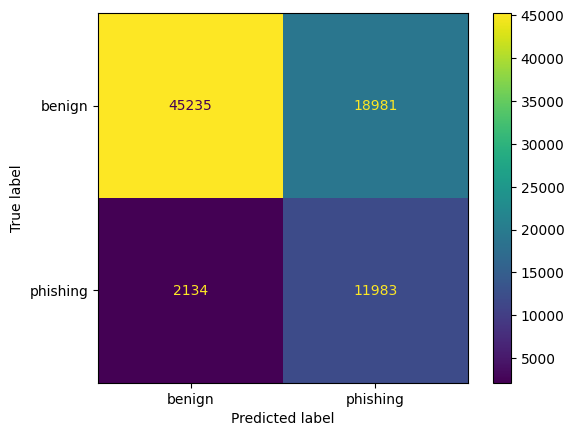

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [11]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [12]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.7304456614708998, 'Precision': 0.3869978039013047, 'Recall': 0.8488347382588368, 'F1_score': 0.5316208602293649}


In [13]:
df = pd.read_csv("../Metrics of Dataset #3.csv")

In [14]:
metrics = pd.DataFrame({"Model": "MLP", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [17]:
df = pd.concat([df, metrics], ignore_index=True)

In [18]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.625305,0.304140,0.837855,0.446281
1,Random Forest,0.730088,0.386604,0.848410,0.531166
2,XGBoost,0.731250,0.387838,0.849331,0.532510
3,MLP,0.730446,0.386998,0.848835,0.531621


In [19]:
df.to_csv("../Metrics of Dataset #3.csv", index=False)

In [20]:
dump(mlp, 'MLP #3.joblib')

['MLP #3.joblib']